## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [82]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,LabelBinarizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load and visualize the dataset.

In [47]:
df = pd.read_csv("./Credit.csv")
df.drop(["ID","Unnamed: 0"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [48]:
df.head()
categorical_feature_mask = df.dtypes==object

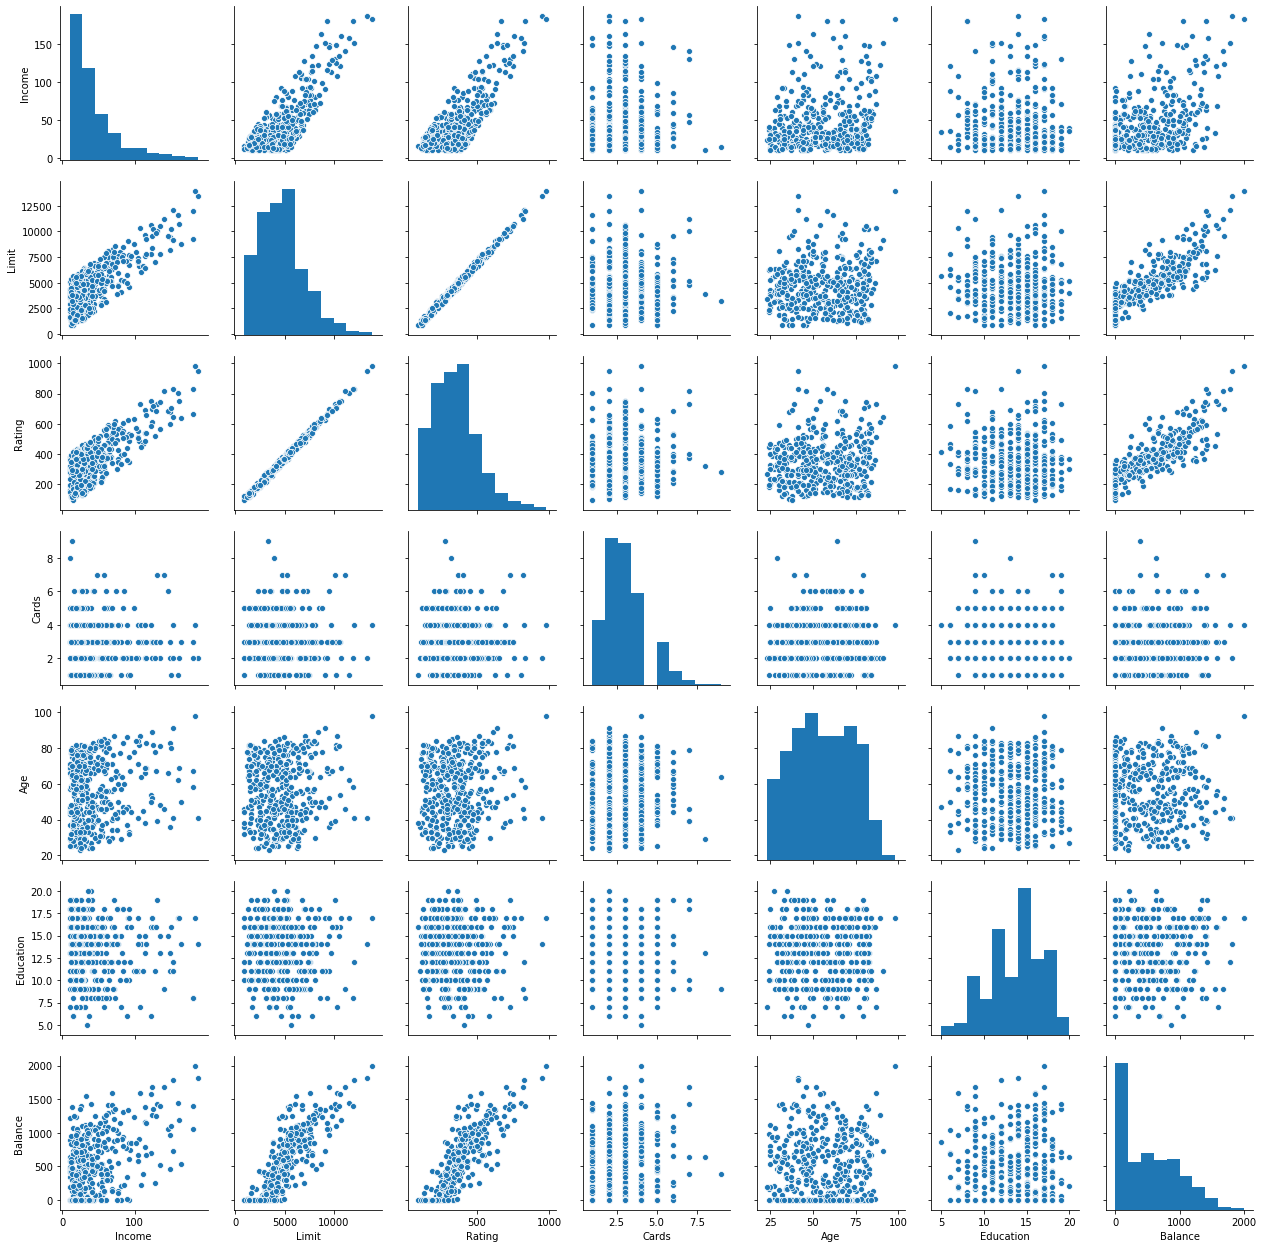

In [7]:
sns.pairplot(df)

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

One Hot encoding is a form of encoding in which a class is represented by a vector of shape n_classx1. So each class is represented by a 1 in that vector with all other elements of that vector being 0.  
Binary encoding encodes it in a different manner. In this method each class is represented by a vector of shape log2(n_classes)x1. In this each class is represented by the binary encoding of the integer it is represented with. For instance class with label as 3 will be represented as 011.

In [49]:
labels_to_encode = ["Gender","Student","Married","Ethnicity"]
le = LabelEncoder()
df[labels_to_encode] = df[labels_to_encode].apply(le.fit_transform)

In [50]:
df_one = pd.DataFrame(OneHotEncoder(categorical_features=categorical_feature_mask,sparse=False).fit_transform(df))

In [63]:
df_one

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0,333.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,106.025,6645.0,483.0,3.0,82.0,15.0,903.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,104.593,7075.0,514.0,4.0,71.0,11.0,580.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,148.924,9504.0,681.0,3.0,36.0,11.0,964.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55.882,4897.0,357.0,2.0,68.0,16.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.096,4100.0,307.0,3.0,32.0,13.0,560.0
396,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13.364,3838.0,296.0,5.0,65.0,17.0,480.0
397,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,57.872,4171.0,321.0,5.0,67.0,12.0,138.0
398,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,37.728,2525.0,192.0,1.0,44.0,13.0,0.0


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

Centering and standardizing of data is really necessary because:-  
1. For liner models , centering removes the need of learning one other parameter for bias
2. Scaling helps to balance features. For instance, if a variable is in meters and other in mm, their scaling might lead to unequal importance given to each variable
3. For models which learn through gradient approach, standardizing helps in faster and more stable convergence.
4. For models such as lasso and ridge which penalized based on weights, different scaled features will be penalized incorrectly due to scale difference  
  
Standard least square is scale invariant. However model like ridge regression , since it penalized based on weights of the model, it is scale variant


In [64]:
df_one.iloc[:,9:]=StandardScaler().fit_transform(df_one.iloc[:,9:])

#### Split dataset into training and validation set (80:20)

In [70]:
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(df_one.iloc[:,:-1].values,df_one.iloc[:,-1].values,train_size=0.8,random_state=23)

#### Use linear regression. 
- Report training and validation error. 

In [93]:
#Linear regression
model = LinearRegression().fit(X_train,y_train)
coefficients = model.coef_.copy()
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("The equation for Linear is {}:".format(coefficients))
print("Training error:{}".format(np.mean((y_pred_train-y_train)**2)))
print("Testing error:{}".format(np.mean((y_pred_test-y_test)**2)))

The equation for Linear is [-4.31849872e+10 -4.31849872e+10  2.84441602e+11  2.84441602e+11
 -3.83214943e+12 -3.83214943e+12  4.28327518e+12  4.28327518e+12
  4.28327518e+12 -5.92867732e-01  1.03077888e+00  3.02631617e-01
  5.97914457e-02 -2.10109353e-02 -5.22613525e-03]:
Training error:0.04656179939656759
Testing error:0.03934097150429531


#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

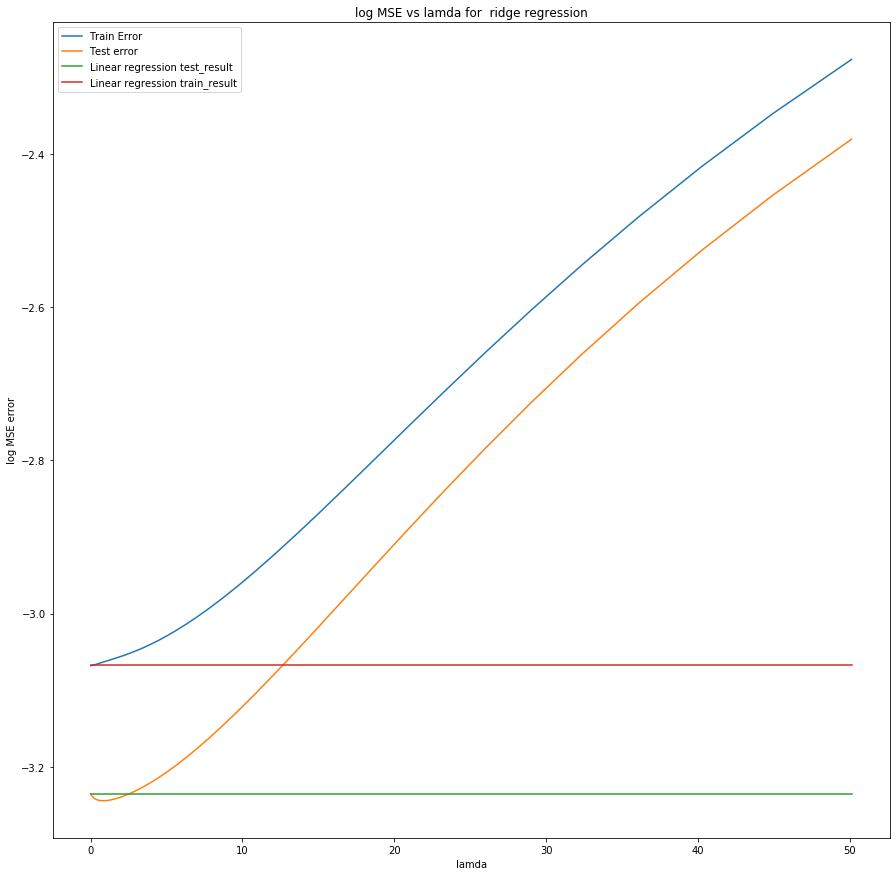

In [118]:
# Training and validation MSE vs lambda for rigde and Lasso regression
lambda_set = np.logspace(-3,1.7,100)
mse_list_test_ridge = []
mse_list_train_ridge = []
ridge_model_coeffs = []
for lamda in lambda_set:
    #Fitting using linear regression
    reg_ridge = Ridge(alpha = lamda).fit(X_train, y_train)
    ridge_model_coeffs.append(reg_ridge.coef_)
    #Prediction
    y_pred_test_ridge = reg_ridge.predict(X_test)
    y_pred_train_ridge = reg_ridge.predict(X_train)
    #MSE and storing it in a list
    mse_list_test_ridge.append(np.mean((y_test-y_pred_test_ridge)**2))
    mse_list_train_ridge.append(np.mean((y_train-y_pred_train_ridge)**2)) 

#plotting
fig = plt.figure(figsize = [15,15])
#Ridge regression plot for train
plt.plot(lambda_set,np.log(mse_list_train_ridge))
plt.plot(lambda_set,np.log(mse_list_test_ridge))
plt.plot(lambda_set,np.log(0.03934097150429531*np.ones(len(lambda_set))))
plt.plot(lambda_set,np.log(0.04656179939656759*np.ones(len(lambda_set))))
plt.title("log MSE vs lamda for  ridge regression")
plt.xlabel("lamda")
plt.ylabel("log MSE error")
plt.legend(["Train Error","Test error","Linear regression test_result","Linear regression train_result"])
plt.show()

We can see that test error of linear regression more than certain lamda for ridge regression. Same can be said for train error

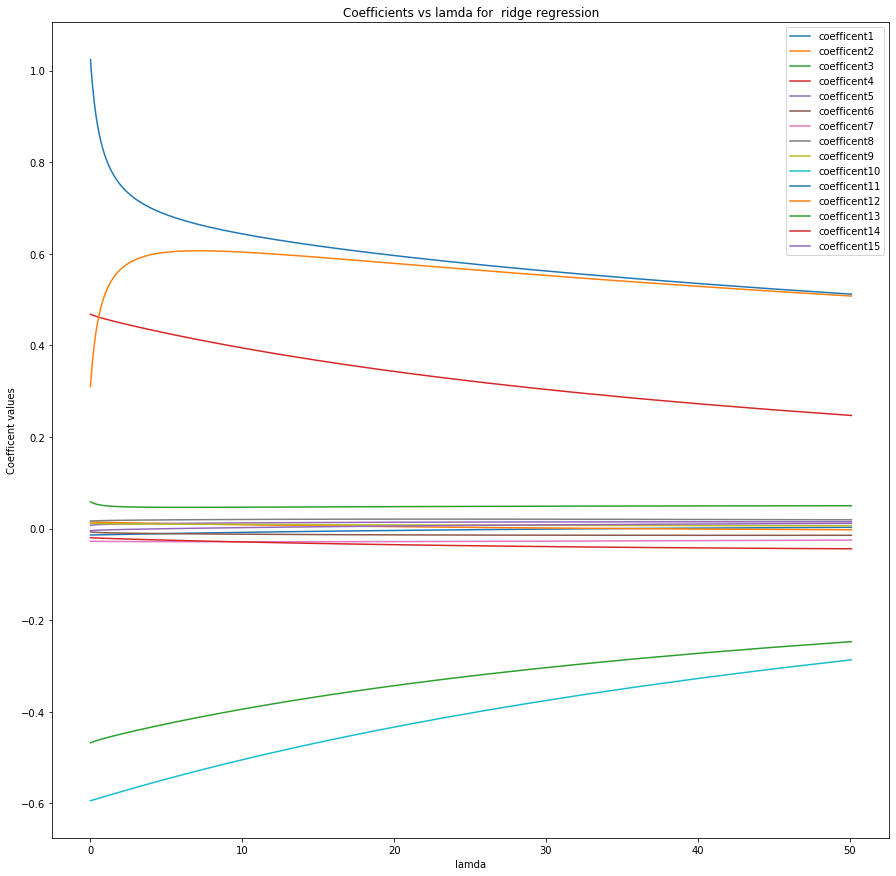

In [123]:
#Converting to matrix for easy data accesibily
ridge_model_coeffs=np.matrix(ridge_model_coeffs)
legend = []
fig = plt.figure(figsize = [15,15])
for i in range(np.shape(ridge_model_coeffs)[1]):
    #plotting
    #Ridge regression plot for coefficent 
    plt.plot(lambda_set,ridge_model_coeffs[:,i])
    legend.append("coefficent{}".format(i+1))
plt.title("Coefficients vs lamda for  ridge regression")
plt.xlabel("lamda")
plt.ylabel("Coefficent values")
plt.legend(legend)
plt.show()

In [122]:
#Grid Search CV
parameters = {'alpha':lambda_set}
reg_ridge = Ridge()
best_model = GridSearchCV(reg_ridge, parameters, cv=7,verbose=1)
best_model.fit(X_train,y_train)
print("Best lamda:{}".format(best_model.best_params_))
#About model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
print("Training error:{}".format(np.mean((y_pred_train-y_train)**2)))
print("Testing error:{}".format(np.mean((y_pred_test-y_test)**2)))

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best lamda:{'alpha': 0.29422994371143363}
Training error:0.04657943795060847
Testing error:0.039097890281863536


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.6s finished


####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

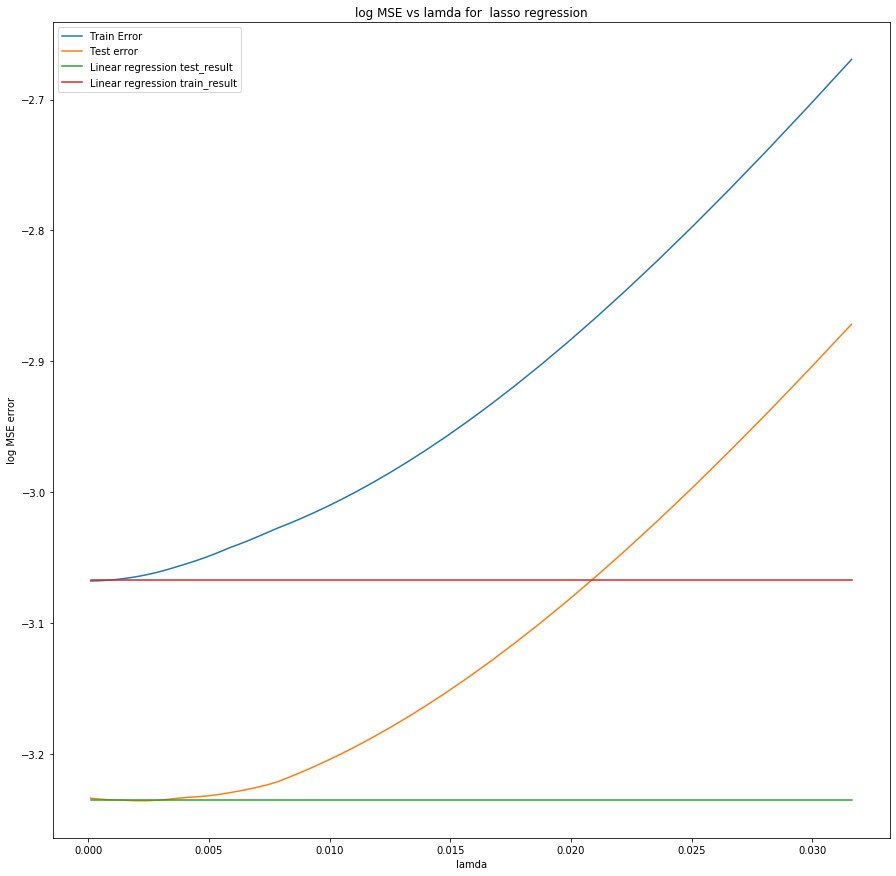

In [137]:
#HIGH RESOLUTION FOR COMPARISON
# Training and validation MSE vs lambda for rigde and Lasso regression
lambda_set = np.logspace(-4,-1.5,100)
mse_list_test_lasso = []
mse_list_train_lasso = []
lasso_model_coeffs = []
for lamda in lambda_set:
    #Fitting using linear regression
    reg_lasso = Lasso(alpha = lamda).fit(X_train, y_train)
    lasso_model_coeffs.append(reg_lasso.coef_)
    #Prediction
    y_pred_test_lasso = reg_lasso.predict(X_test)
    y_pred_train_lasso = reg_lasso.predict(X_train)
    #MSE and storing it in a list
    mse_list_test_lasso.append(np.mean((y_test-y_pred_test_lasso)**2))
    mse_list_train_lasso.append(np.mean((y_train-y_pred_train_lasso)**2)) 

#plotting
fig = plt.figure(figsize = [15,15])
#Ridge regression plot for train
plt.plot(lambda_set,np.log(mse_list_train_lasso))
plt.plot(lambda_set,np.log(mse_list_test_lasso))
plt.plot(lambda_set,np.log(0.03934097150429531*np.ones(len(lambda_set))))
plt.plot(lambda_set,np.log(0.04656179939656759*np.ones(len(lambda_set))))
plt.title("log MSE vs lamda for  lasso regression")
plt.xlabel("lamda")
plt.ylabel("log MSE error")
plt.legend(["Train Error","Test error","Linear regression test_result","Linear regression train_result"])
plt.show()

We can see that test error of linear regression more than certain lamda for lasso regression. Same can be said for train error. We can also see that for higher lamdas, the lasso MSE becomes constant, indicating all coefficients are 0(in the below plots) 

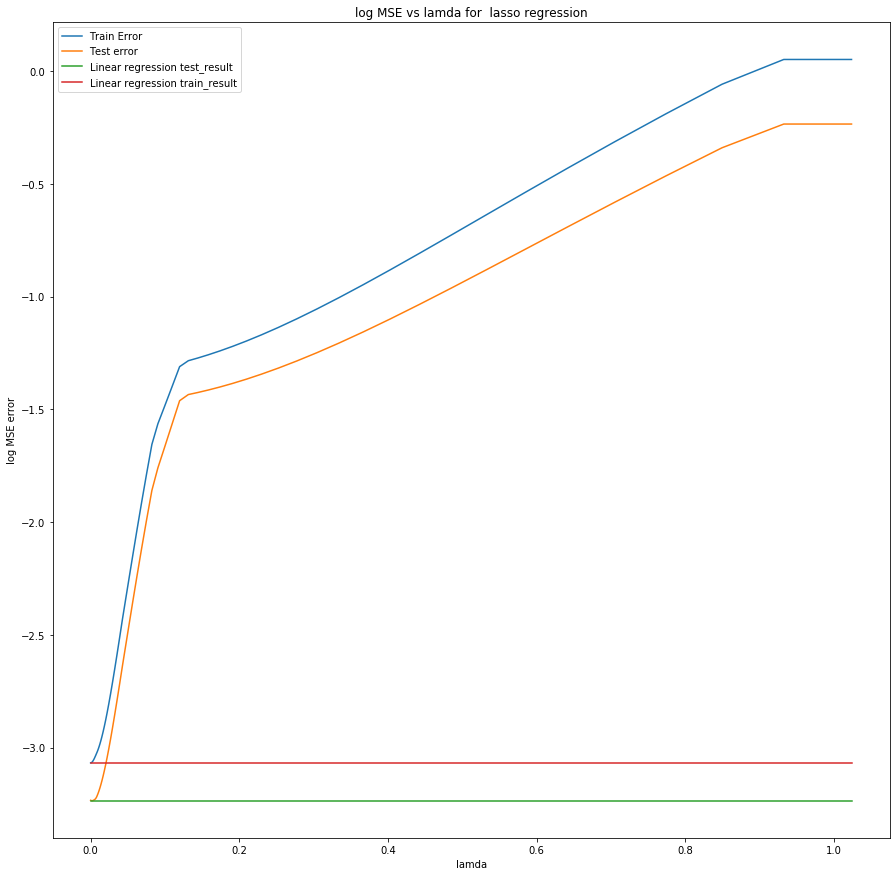

In [152]:
# Training and validation MSE vs lambda for rigde and Lasso regression
lambda_set = np.logspace(-4,0.01,100)
mse_list_test_lasso = []
mse_list_train_lasso = []
lasso_model_coeffs = []
for lamda in lambda_set:
    #Fitting using linear regression
    reg_lasso = Lasso(alpha = lamda).fit(X_train, y_train)
    lasso_model_coeffs.append(reg_lasso.coef_)
    #Prediction
    y_pred_test_lasso = reg_lasso.predict(X_test)
    y_pred_train_lasso = reg_lasso.predict(X_train)
    #MSE and storing it in a list
    mse_list_test_lasso.append(np.mean((y_test-y_pred_test_lasso)**2))
    mse_list_train_lasso.append(np.mean((y_train-y_pred_train_lasso)**2)) 

#plotting
fig = plt.figure(figsize = [15,15])
#Ridge regression plot for train
plt.plot(lambda_set,np.log(mse_list_train_lasso))
plt.plot(lambda_set,np.log(mse_list_test_lasso))
plt.plot(lambda_set,np.log(0.03934097150429531*np.ones(len(lambda_set))))
plt.plot(lambda_set,np.log(0.04656179939656759*np.ones(len(lambda_set))))
plt.title("log MSE vs lamda for  lasso regression")
plt.xlabel("lamda")
plt.ylabel("log MSE error")
plt.legend(["Train Error","Test error","Linear regression test_result","Linear regression train_result"])
plt.show()

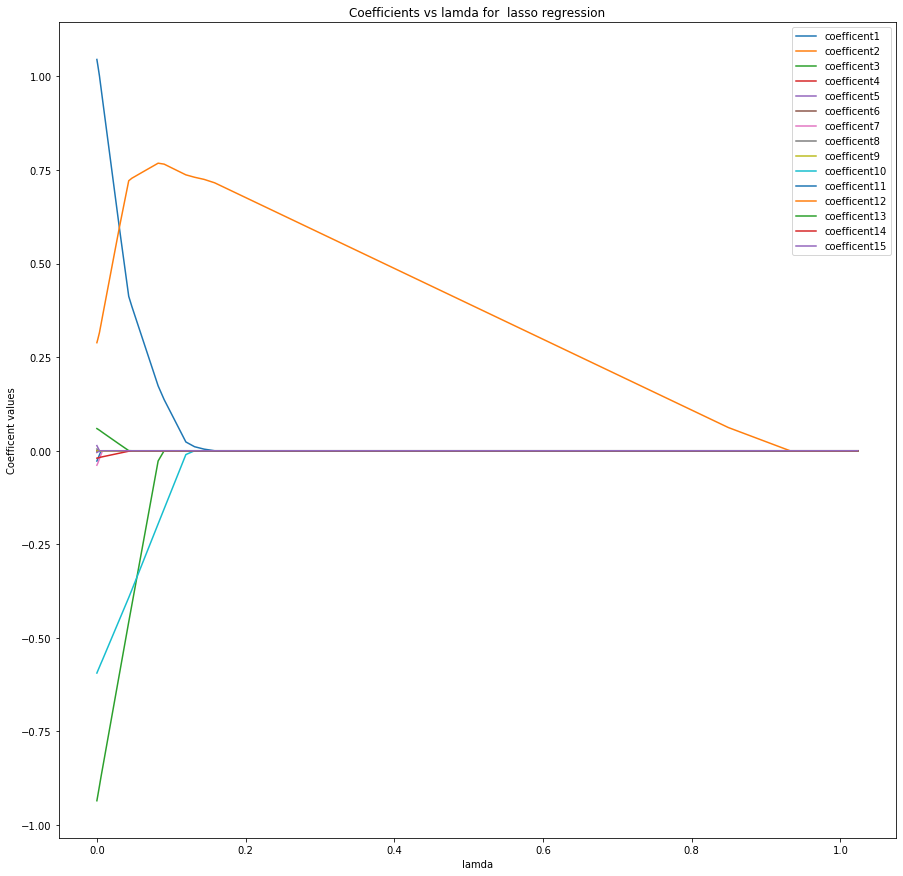

In [153]:
#Converting to matrix for easy data accesibily
lasso_model_coeffs=np.matrix(lasso_model_coeffs)
legend = []
fig = plt.figure(figsize = [15,15])
for i in range(np.shape(lasso_model_coeffs)[1]):
    #plotting
    #Ridge regression plot for coefficent 
    plt.plot(lambda_set,lasso_model_coeffs[:,i])
    legend.append("coefficent{}".format(i+1))
plt.title("Coefficients vs lamda for  lasso regression")
plt.xlabel("lamda")
plt.ylabel("Coefficent values")
plt.legend(legend)
plt.show()

In [154]:
#Grid Search CV
parameters = {'alpha':lambda_set}
reg_lasso = Lasso()
best_model = GridSearchCV(reg_lasso, parameters, cv=7,verbose=1)
best_model.fit(X_train,y_train)
print("Best lamda:{}".format(best_model.best_params_))
#About model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
print("Training error:{}".format(np.mean((y_pred_train-y_train)**2)))
print("Testing error:{}".format(np.mean((y_pred_test-y_test)**2)))

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best lamda:{'alpha': 0.0013618880656713643}
Training error:0.04659735820372599
Testing error:0.03935531767040361


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    3.2s finished


#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

Q1) As lambda increases the coefficients of the model, for ridge regression model, the coefficients saturate to a value around 0 but not exactly 0. For lasso, the coefficients are exactly driven to 0.  
Q2) For the first case ridge regression is best as all predictors are important,hence ridge regression will ensure all variables are present for the out put response. So validation error wise it will be a good model however not clear in terms of interpretabilty.  
For the second case lasso regression is best as we know only particular features are responsible for the output. However even though interpretabilty is really good, validation error might not be so good.  
Q3) Imp features are feature gender, student,Ethinicity,Income,limit,rating,cards,Age

In [165]:
reg_lasso = Lasso(alpha = best_model.best_params_['alpha']).fit(X_train, y_train)
coefficients = (reg_lasso.coef_)
print("The equation for Lasso is {}:".format(coefficients))

The equation for Lasso is [-2.16577796e-02  9.62695054e-16 -9.21136557e-01  0.00000000e+00
  8.78379577e-03 -2.18628534e-18 -3.31827919e-02  1.92812033e-04
 -0.00000000e+00 -5.88059242e-01  1.03012769e+00  2.97933842e-01
  5.77578049e-02 -1.91817724e-02 -3.14670189e-03]:


In [166]:
df_one.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633


In [170]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.